<a href="https://colab.research.google.com/github/cjudithrb/MultiAgent-LangGraph-AdRouter-CafeAI/blob/main/campanapub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain_ollama pydantic typeddict langgraph ipython python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 9.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langgraph to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langgraph to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the d

In [3]:
!pip install langchain_ollama

  Using cached langchain_ollama-1.0.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached ollama-0.6.1-py3-none-any.whl.metadata (4.3 kB)


### Equipo publicitario para Cafe.AI ☕😎
A continuación, considere el lanzamiento de un nuevo cafe en su barrio llamado Cafe.AI ☕
Café donde la tecnología y el sabor convergen, tu espacio para conectar, crear e innovar, una taza a la vez. Diseñado como un café inteligente para mentes creativas, con conexión rápida, café excepcional y un ambiente pensado para que tus mejores ideas florezcan. Aquí, café más IA equivale a tu nuevo espacio de trabajo donde la creatividad se sirve con crema. Un lugar destinado a innovadores, desarrolladores y soñadores que entienden que la mejor idea surge en una buena conversación, con datos, diálogos y el café más inteligente de la ciudad en la misma mesa.

En base al código revisado en clase, proponga un equipo publicitario encargado de su primera campaña publicitaria para redes sociales. Dicho equipo debe contar con un enrutador, un rol creativo, uno redactor y un diseñador.

In [25]:
from langchain_ollama import ChatOllama # Establece la conexión con el modelo de lenguaje de Ollama
llm = ChatOllama(model="llama3.2:latest", temperature=0.2)

In [9]:
%%bash
# Instalar dependencias necesarias y el binario de Ollama (apoyado por Gemini)
apt-get update && apt-get install -y zstd
curl -fsSL https://ollama.com/install.sh | sh

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [85.0 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Packages [39.2 kB]
Get:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 Packages [75.3 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
>>> Installing ollama to /usr/local
>>> Downloading ollama-linux-amd64.tar.zst
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [53]:
import subprocess
import time

# Iniciar el servidor de Ollama en segundo plano
process = subprocess.Popen(['ollama', 'serve'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Esperar unos segundos a que el servidor arranque
time.sleep(5)
print("Servidor Ollama iniciado.")

!ollama pull llama3.2:latest
print("Modelo Llama 3.2 descargado")

Servidor Ollama iniciado.

Modelo Llama 3.2 descargado


In [54]:
from typing_extensions import Literal, TypedDict
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage, SystemMessage

# Esquema para el enrutamiento publicitario
class Route(BaseModel):
    step: Literal["Creativo", "Redactor", "Disenador"] = Field(
        None, description="El especialista del equipo publicitario que debe actuar"
    )

router = llm.with_structured_output(Route)

In [55]:
# Estado del Grafo
class State(TypedDict):
    input: str
    decision: str
    output: str

# Nodos del Equipo Publicitario
def rol_creativo(state: State):
    """Genera conceptos y estrategias creativas para Cafe.AI"""
    print("ROL CREATIVO")
    prompt = f"Actúa como un Director Creativo. Genera un concepto innovador para Cafe.AI basado en: {state['input']}"
    result = llm.invoke(prompt)
    return {"output": result.content}

def rol_redactor(state: State):
    """Escribe los textos (copy) para redes sociales"""
    print("ROL REDACTOR")
    prompt = f"Actúa como un Copywriter Senior. Escribe un post persuasivo para Redes Sociales sobre Cafe.AI: {state['input']}"
    result = llm.invoke(prompt)
    return {"output": result.content}

def rol_disenador(state: State):
    """Define la línea visual o prompts de imagen"""
    print("ROL DISEÑADOR")
    prompt = f"Actúa como un Director de Arte. Describe la composición visual y el estilo estético para la campaña de Cafe.AI: {state['input']}"
    result = llm.invoke(prompt)
    return {"output": result.content}

def enrutador(state: State):
    """Enruta la solicitud al especialista adecuado"""
    decision = router.invoke([
        SystemMessage(content="Determina si el usuario necesita un concepto (creativo), un texto para redes (redactor) o una guía visual/diseño (disenador)."),
        HumanMessage(content=state["input"]),
    ])
    return {"decision": decision.step}

def route_decision(state: State):
    """Función de control de flujo"""
    if state["decision"] == "Creativo":
        return "rol_creativo"
    elif state["decision"] == "Redactor":
        return "rol_redactor"
    elif state["decision"] == "Disenador":
        return "rol_disenador"

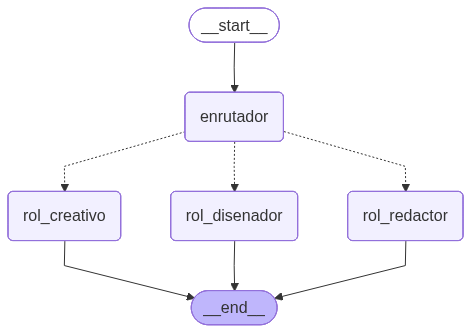

In [56]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Workflow para el equipo publicitario
routerWorkflowBuilder = StateGraph(State)

# Agregar los nuevos nodos
routerWorkflowBuilder.add_node("rol_creativo", rol_creativo)
routerWorkflowBuilder.add_node("rol_redactor", rol_redactor)
routerWorkflowBuilder.add_node("rol_disenador", rol_disenador)
routerWorkflowBuilder.add_node("enrutador", enrutador)

# Definir el flujo
routerWorkflowBuilder.add_edge(START, "enrutador")
routerWorkflowBuilder.add_conditional_edges(
    "enrutador",
    route_decision,
    {
        "rol_creativo": "rol_creativo",
        "rol_redactor": "rol_redactor",
        "rol_disenador": "rol_disenador",
    },
)

routerWorkflowBuilder.add_edge("rol_creativo", END)
routerWorkflowBuilder.add_edge("rol_redactor", END)
routerWorkflowBuilder.add_edge("rol_disenador", END)

# Compilar el flujo
router_workflow = routerWorkflowBuilder.compile()

# Visualizar el grafo
try:
    display(Image(router_workflow.get_graph().draw_mermaid_png()))
except:
    print("Grafo compilado (error visualizando la imagen)")

In [18]:
# Solicitud para que el enrutador elija el rol
state = router_workflow.invoke({"input": "Necesito un copy persuasivo para Instagram para el lanzamiento de Cafe.AI"})
print(state["output"])

ROL CREATIVO
¡Excelente! Como Director Creativo, te presento un concepto innovador para Cafe.AI y un copy persuasivo para Instagram para su lanzamiento.

**Concepto Innovador:** "La Revolución del Café: Donde la Inteligencia se Conecta con el Sabor"

Cafe.AI es una plataforma que combina la inteligencia artificial con la pasión por el café. Nuestro objetivo es crear una experiencia única y personalizada para los amantes del café, donde la tecnología se une con la creatividad y la emoción.

**Copy Persuasivo para Instagram:**

"¡Descubre el futuro del café!

¿Sabías que tu café podría ser perfecto cada vez? Con Cafe.AI, nuestra plataforma revolucionaria, puedes experimentar un nuevo nivel de sabor y conexión con tus sentidos.

Nuestra inteligencia artificial analiza tus preferencias y te ofrece recomendaciones personalizadas para encontrar tu café ideal. Desde la calidad del grano hasta la temperatura perfecta, cada detalle se cuida con amor y atención.

¡Únete a la revolución del café!